In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
# Importing the required libraries
from keras.models import Sequential
from scipy.misc import imread
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense
import pandas as pd

from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.applications.vgg16 import decode_predictions
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D, Dropout, Flatten, merge, Reshape, Activation

from sklearn.metrics import log_loss
from keras.models import Model
from keras.utils import multi_gpu_model
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.preprocessing.image import ImageDataGenerator

/home/arpit/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
num_classes = 30

In [4]:
model = InceptionV3(weights='imagenet', include_top=True)

In [5]:
model.layers.pop()
x = model.layers[-1].output
x = Dense(num_classes, activation='softmax')(x)
model = Model(input = model.input, output = x)

/home/arpit/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.


In [ ]:
model.summary()

In [7]:
for layer in model.layers[:1]:
    layer.trainable = False

In [ ]:

# Check the trainable status of the individual layers# Check  # Check  
for layer in model.layers:
    print(layer, layer.trainable)

In [9]:

# Learning rate is changed to 0.001# Learni 
sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [11]:
img_width, img_height = 299, 299

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
test_data_dir = 'data/test'

nb_train_samples = 13000
# nb_validation_samples = 5000
epochs = 20
batch_size = 64

In [14]:
batch_size = 64

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'data/train',  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical', 
        shuffle=True,
        seed = 42)  # since we use binary_crossentropy loss, we need binary labels

Found 13000 images belonging to 30 classes.


In [49]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=13000 // batch_size,
        epochs=15)

Epoch 1/15
203/203 [==============================] - 248s 1s/step - loss: 0.0237 - acc: 0.9951
Epoch 2/15
203/203 [==============================] - 249s 1s/step - loss: 0.0212 - acc: 0.9952
Epoch 3/15
203/203 [==============================] - 244s 1s/step - loss: 0.0205 - acc: 0.9948
Epoch 4/15
203/203 [==============================] - 244s 1s/step - loss: 0.0179 - acc: 0.9962
Epoch 5/15
203/203 [==============================] - 246s 1s/step - loss: 0.0158 - acc: 0.9970
Epoch 6/15
203/203 [==============================] - 246s 1s/step - loss: 0.0153 - acc: 0.9966
Epoch 7/15
203/203 [==============================] - 247s 1s/step - loss: 0.0131 - acc: 0.9973
Epoch 8/15
203/203 [==============================] - 245s 1s/step - loss: 0.0128 - acc: 0.9984
Epoch 9/15
203/203 [==============================] - 246s 1s/step - loss: 0.0101 - acc: 0.9984
Epoch 10/15
203/203 [==============================] - 244s 1s/step - loss: 0.0141 - acc: 0.9968
Epoch 11/15
203/203 [==================

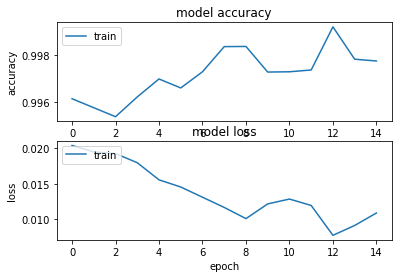

In [63]:
plt.figure(1)  

# summarize history for accuracy  

plt.subplot(211)  
plt.plot(history.history['acc'])  
# plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  

# summarize history for loss  

plt.subplot(212)  
plt.plot(history.history['loss'])  
# plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

In [51]:
# model.save_weights('inception_fine_tune_15_epochs.h5')

### Making the prediction for test dataset

In [52]:
test_generator = test_datagen.flow_from_directory(
    directory="data/test",
    target_size=(224, 224),
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 6000 images belonging to 1 classes.


In [53]:
test_generator.reset()
pred=model.predict_generator(test_generator,verbose=1)

6000/6000 [==============================] - 147s 25ms/step


In [54]:
predicted_class_indices=np.argmax(pred,axis=1)

In [55]:
predicted_class_indices[:5]

array([ 4,  8, 29,  8,  6])

In [56]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

In [57]:
predictions = [labels[k] for k in predicted_class_indices]

In [58]:
predictions[:5]

['buffalo', 'dalmatian', 'wolf', 'dalmatian', 'chimpanzee']

In [59]:
train_generator.class_indices

{'antelope': 0,
 'bat': 1,
 'beaver': 2,
 'bobcat': 3,
 'buffalo': 4,
 'chihuahua': 5,
 'chimpanzee': 6,
 'collie': 7,
 'dalmatian': 8,
 'german+shepherd': 9,
 'grizzly+bear': 10,
 'hippopotamus': 11,
 'horse': 12,
 'killer+whale': 13,
 'mole': 14,
 'moose': 15,
 'mouse': 16,
 'otter': 17,
 'ox': 18,
 'persian+cat': 19,
 'raccoon': 20,
 'rat': 21,
 'rhinoceros': 22,
 'seal': 23,
 'siamese+cat': 24,
 'spider+monkey': 25,
 'squirrel': 26,
 'walrus': 27,
 'weasel': 28,
 'wolf': 29}

In [60]:
filenames=test_generator.filenames

In [61]:
results=pd.DataFrame({"filename":filenames})
results.to_csv("results/filenames.csv",index=False)

In [62]:
results=pd.DataFrame(pred)
results.to_csv("results/results_inception_fine_tune.csv",index=False)

In [27]:
files = pd.DataFrame(filenames)

In [29]:
preds = pd.DataFrame(pred)

In [30]:
preds.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000002,0.000002,0.000003,0.000001,0.999940,0.000001,0.000002,0.000002,0.000002,0.000001,...,6.110362e-07,0.000003,0.000002,3.613444e-07,0.000002,8.197469e-07,7.491843e-07,5.538037e-07,0.000001,2.375579e-07
1,0.000029,0.000007,0.000013,0.000028,0.000021,0.000046,0.000026,0.000025,0.999246,0.000032,...,1.014051e-05,0.000044,0.000031,2.416370e-05,0.000009,8.286281e-05,1.826507e-05,1.531091e-05,0.000039,1.715766e-05
2,0.000010,0.000006,0.000016,0.000286,0.000020,0.000011,0.000012,0.000031,0.000013,0.000025,...,4.446443e-05,0.000016,0.000010,1.773480e-05,0.000054,2.203039e-05,5.392509e-05,7.087227e-06,0.000018,9.990959e-01
3,0.000052,0.000017,0.000031,0.000103,0.000076,0.000100,0.000043,0.000055,0.998359,0.000049,...,2.221194e-05,0.000094,0.000070,3.561251e-05,0.000027,1.268866e-04,3.534144e-05,6.213373e-05,0.000080,4.189270e-05
4,0.000004,0.000009,0.000009,0.000018,0.000006,0.000003,0.999728,0.000020,0.000003,0.000010,...,6.285660e-06,0.000004,0.000005,2.374842e-06,0.000004,2.350865e-05,2.511349e-06,1.334101e-05,0.000018,5.631748e-06


In [37]:
from keras.utils import np_utils

In [38]:
a = np_utils.to_categorical(predicted_class_indices)

In [41]:
preds = pd.DataFrame(a)

In [43]:
preds.shape

(6000, 30)

In [44]:
final = pd.concat([files, preds], axis=1)

In [45]:
final.head()

,0,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,images/Img-1.jpg,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,images/Img-10.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,images/Img-100.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,images/Img-1000.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,images/Img-1001.jpg,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
final.to_csv("results/results_inception_fine_tune_one_hot_encode.csv",index=False)